In [4]:
import pandas as pd
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

### RUNS.CSV

In [6]:
df_runs = pd.read_csv("../data/raw/runs.csv")
df_runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [7]:
df_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

In [8]:
df_for_prediction = df_runs.drop(columns =['finish_time','horse_no'])
df_for_prediction = df_for_prediction.drop(columns =['position_sec1','position_sec2','position_sec3','position_sec4','position_sec5','position_sec6'])
df_for_prediction = df_for_prediction.drop(columns =['behind_sec1','behind_sec2','behind_sec3','behind_sec4','behind_sec5','behind_sec6'])
df_for_prediction = df_for_prediction.drop(columns =['time1','time2','time3','time4','time5','time6'])


In [9]:
df_for_prediction

,race_id,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,trainer_id,jockey_id
0,0,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,118,2
1,0,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,164,57
2,0,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,137,18
3,0,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,80,59
4,0,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,1238,6,0.0,1.25,5,AUS,Gelding,87,TT/V,1191.0,122,6,99.0,NaN,73,40
79443,6348,985,7,0.0,2.25,5,NZ,Gelding,84,--,1070.0,119,4,99.0,NaN,164,63
79444,6348,3147,10,0.0,3.00,5,NZ,Gelding,83,H/XB,1148.0,120,1,99.0,NaN,111,68
79445,6348,1982,8,0.0,2.50,3,AUS,Gelding,82,--,1266.0,119,12,4.6,NaN,118,95


In [10]:
df_for_prediction.query("horse_gear == '--'").count()

race_id            57373
horse_id           57373
result             57373
won                57373
lengths_behind     57373
horse_age          57373
horse_country      57371
horse_type         57371
horse_rating       57373
horse_gear         57373
declared_weight    57373
actual_weight      57373
draw               57373
win_odds           57373
place_odds         56520
trainer_id         57373
jockey_id          57373
dtype: int64

In [11]:
df_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_id         79447 non-null  int64  
 2   result           79447 non-null  int64  
 3   won              79447 non-null  float64
 4   lengths_behind   79447 non-null  float64
 5   horse_age        79447 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79447 non-null  int64  
 9   horse_gear       79447 non-null  object 
 10  declared_weight  79447 non-null  float64
 11  actual_weight    79447 non-null  int64  
 12  draw             79447 non-null  int64  
 13  win_odds         79447 non-null  float64
 14  place_odds       75712 non-null  float64
 15  trainer_id       79447 non-null  int64  
 16  jockey_id        79447 non-null  int64  
dtypes: float64(5

### RACES.CSV

In [12]:
df_races = pd.read_csv("../data/races.csv")

df_races = df_races.drop(columns =['sec_time1','sec_time2','sec_time3','sec_time4','sec_time5','sec_time6', 'sec_time7'])
df_races = df_races.drop(columns =['time1','time2','time3','time4','time5','time6', 'time7'])

df_races

FileNotFoundError: [Errno 2] No such file or directory: '../data/races.csv'

In [ ]:
df_races['date'] = pd.to_datetime(df_races['date'])
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   race_id             6349 non-null   int64         
 1   date                6349 non-null   datetime64[ns]
 2   venue               6349 non-null   object        
 3   race_no             6349 non-null   int64         
 4   config              6349 non-null   object        
 5   surface             6349 non-null   int64         
 6   distance            6349 non-null   int64         
 7   going               6349 non-null   object        
 8   horse_ratings       6349 non-null   object        
 9   prize               5887 non-null   float64       
 10  race_class          6349 non-null   int64         
 11  place_combination1  6349 non-null   int64         
 12  place_combination2  6349 non-null   int64         
 13  place_combination3  6324 non-null   float64     

In [ ]:
print(df_races['date'].min())
print(df_races['date'].max())

1997-06-02 00:00:00
2005-08-28 00:00:00


In [ ]:
print(df_races['prize'].min())
print(df_races['prize'].max())

485000.0
25000000.0


In [ ]:
df_races.tail()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
6344,6344,2005-08-28,ST,6,A,0,1400,GOOD,115-95,2500000.0,1,6,7,5.0,NaN,13.5,14.5,62.5,NaN,6,38.0,NaN,NaN
6345,6345,2005-08-28,ST,7,A,0,1600,GOOD,G,23000000.0,11,5,6,14.0,NaN,18.0,20.5,45.0,NaN,5,60.0,NaN,NaN
6346,6346,2005-08-28,ST,8,A,0,2000,GOOD,G,25000000.0,11,2,8,5.0,NaN,11.0,27.5,38.5,NaN,2,17.5,NaN,NaN
6347,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,9,6,4.0,NaN,11.0,37.0,21.5,NaN,9,16.0,NaN,NaN
6348,6348,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,2,4,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN


In [ ]:
df_races['surface'].unique()

array([0, 1])

In [ ]:
df_races['race_no'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Faire un seul dataframe possédant une ligne par produit cartésien cheval x course 

In [ ]:
df = pd.merge(df_races,df_for_prediction, on='race_id', how='inner')

df.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,9,154


race_id : put in index
date : remove but keep rows in order
venue : one hot encoding
race_no : remove
config : ? remove ?
surface : one hot encoding
distance : one hot encoding
going : ? keep ?
horse_ratings : always the same ?
prize : remove (we will use that information in the process but not in the prediction)
race_class : what is it ?
place_combination1,2,3 : remove (info for the y axis)
place_combination4 : remove
place_dividend1,2,3 : remove (info for the y axis) > make 2 analysis after, based on if the horse is placed or not based on statistics
place_dividend4 : remove
win_comlbination1 : remove (info for the y axis)
win_dividend1 : remove (info for the y axis)
win_combination2 : remove (cas particulier)
win_dividend2 : remove (cas particulier)
horse_id : c'est notre y
result : c'est notre y ? (faire une métrique genre average ranking over the last 30 races)
won : c'est notre y
lengths_behind : keep but metric (average lenghts behind over the last 30 races)
horse_age : keep
horse_country : one hot encoding but why not remove
horse_rating : always the same ?
horse_gear: always blank ?
declared_weight : keep
actual_weight : keep
draw : ?
win_odds : keep
place_odds : keep 
trainer_id : keep one hot
jockey_id : keep one hot

In [ ]:
mask = df[df['race_id'] == 0]

mask

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,9,154
5,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3296,3,0.0,1.25,3,NZ,Gelding,60,--,1114.0,127,5,7.0,1.8,54,34
6,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,911,12,0.0,9.50,3,NZ,Gelding,60,--,978.0,123,11,99.0,28.0,55,149
7,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2170,1,1.0,0.00,3,AUS,Gelding,60,--,1170.0,128,2,12.0,3.6,47,183
8,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1730,13,0.0,9.75,3,NZ,Gelding,60,--,1126.0,123,6,38.0,13.0,75,131
9,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2998,14,0.0,999.00,3,AUS,Mare,60,--,1072.0,125,9,39.0,12.0,109,145


In [ ]:
race_counts = df['race_id'].value_counts()
average_rows_per_race = race_counts.mean()
print("Average number of rows per unique race_id:", average_rows_per_race)

Average number of rows per unique race_id: 12.515280403276623


garder cette formulation en tête

In [ ]:
df.query("race_id == 0 and venue == 'ST'")

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,9,154
5,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3296,3,0.0,1.25,3,NZ,Gelding,60,--,1114.0,127,5,7.0,1.8,54,34
6,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,911,12,0.0,9.50,3,NZ,Gelding,60,--,978.0,123,11,99.0,28.0,55,149
7,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2170,1,1.0,0.00,3,AUS,Gelding,60,--,1170.0,128,2,12.0,3.6,47,183
8,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1730,13,0.0,9.75,3,NZ,Gelding,60,--,1126.0,123,6,38.0,13.0,75,131
9,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2998,14,0.0,999.00,3,AUS,Mare,60,--,1072.0,125,9,39.0,12.0,109,145


un cheval participe t'il à plusieurs courses au sein de la même journée

In [ ]:
duplicates = df.groupby(['date', 'horse_id']).size().reset_index(name='count')

# Filter rows where count is greater than 1
duplicates = duplicates[duplicates['count'] > 1]

# Display result
print(duplicates)

Empty DataFrame
Columns: [date, horse_id, count]
Index: []


non

In [ ]:
print(df['surface'].nunique())
print(df['distance'].nunique())
print(df['going'].nunique())
print(df['horse_country'].nunique())
print(df['horse_type'].nunique())
print(df['horse_gear'].nunique())
print(df['trainer_id'].nunique())
print(df['jockey_id'].nunique())
print(df['horse_id'].nunique())


2
9
10
16
9
822
176
186
4405


going c l'état de la piste

In [ ]:
df['going'].unique()

array(['GOOD TO FIRM', 'GOOD', 'GOOD TO YIELDING', 'WET SLOW', 'FAST',
       'YIELDING', 'YIELDING TO SOFT', 'SOFT', 'WET FAST', 'SLOW'],
      dtype=object)

In [ ]:
df = df.drop(columns=['date','race_no','horse_ratings','prize','result',
                                         'place_combination1','place_combination2','place_combination3','place_combination4','place_dividend1','place_dividend2','place_dividend3','place_dividend4',
                                         'win_combination1','win_dividend1','win_combination2','win_dividend2',
                                         'lengths_behind','horse_gear','trainer_id','jockey_id'])

In [ ]:
df.set_index("race_id",inplace=True)
df

,venue,config,surface,distance,going,race_class,horse_id,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds
race_id,,,,,,,,,,,,,,,,,
0,ST,A,0,1400,GOOD TO FIRM,5,3917,0.0,3,AUS,Gelding,60,1020.0,133,7,9.7,3.7
0,ST,A,0,1400,GOOD TO FIRM,5,2157,0.0,3,NZ,Gelding,60,980.0,133,12,16.0,4.9
0,ST,A,0,1400,GOOD TO FIRM,5,858,0.0,3,NZ,Gelding,60,1082.0,132,8,3.5,1.5
0,ST,A,0,1400,GOOD TO FIRM,5,1853,0.0,3,SAF,Gelding,60,1118.0,127,13,39.0,11.0
0,ST,A,0,1400,GOOD TO FIRM,5,2796,0.0,3,GB,Gelding,60,972.0,131,14,50.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,ST,A,0,1600,GOOD,2,1238,0.0,5,AUS,Gelding,87,1191.0,122,6,99.0,NaN
6348,ST,A,0,1600,GOOD,2,985,0.0,5,NZ,Gelding,84,1070.0,119,4,99.0,NaN
6348,ST,A,0,1600,GOOD,2,3147,0.0,5,NZ,Gelding,83,1148.0,120,1,99.0,NaN


In [ ]:
df = pd.get_dummies(df, columns=['venue','config','race_class','surface', 'distance', 'going', 'horse_country', 'horse_type'], dtype=int, drop_first=True)
df


,horse_id,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13,surface_1,distance_1200,distance_1400,distance_1600,distance_1650,distance_1800,distance_2000,distance_2200,distance_2400,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,horse_country_JPN,horse_country_NZ,horse_country_SAF,horse_country_SPA,horse_country_USA,horse_country_ZIM,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
race_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3917,0.0,3,60,1020.0,133,7,9.7,3.7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0,2157,0.0,3,60,980.0,133,12,16.0,4.9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
0,858,0.0,3,60,1082.0,132,8,3.5,1.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
0,1853,0.0,3,60,1118.0,127,13,39.0,11.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
0,2796,0.0,3,60,972.0,131,14,50.0,14.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,1238,0.0,5,87,1191.0,122,6,99.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6348,985,0.0,5,84,1070.0,119,4,99.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6348,3147,0.0,5,83,1148.0,120,1,99.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df['place_odds'].fillna(0, inplace=True)

/var/folders/50/2n82y20j037f62p4wj3z9qsw0000gp/T/ipykernel_1933/3317684030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['place_odds'].fillna(0, inplace=True)


In [ ]:
train_ratio = 0.8
split_index = int(len(df)*train_ratio)

df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]


In [ ]:
df_test

,horse_id,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13,surface_1,distance_1200,distance_1400,distance_1600,distance_1650,distance_1800,distance_2000,distance_2200,distance_2400,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,horse_country_JPN,horse_country_NZ,horse_country_SAF,horse_country_SPA,horse_country_USA,horse_country_ZIM,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
race_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5079,1343,1.0,3,63,1194.0,108,13,42.0,7.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5079,2216,0.0,3,62,1157.0,115,12,10.0,2.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5080,2832,0.0,3,100,1110.0,133,10,12.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,1236,0.0,4,95,1026.0,126,9,9.4,2.5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,1278,0.0,3,94,1104.0,127,14,11.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,1238,0.0,5,87,1191.0,122,6,99.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6348,985,0.0,5,84,1070.0,119,4,99.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6348,3147,0.0,5,83,1148.0,120,1,99.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_train_original = df_train.copy()
df_test_original = df_test.copy()

y_train = df_train['won']
X_train = df_train.drop(columns=['won','horse_id'])

y_test = df_test['won']
X_test = df_test.drop(columns=['won','horse_id'])

In [ ]:
X_train.head()

,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13,surface_1,distance_1200,distance_1400,distance_1600,distance_1650,distance_1800,distance_2000,distance_2200,distance_2400,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,horse_country_JPN,horse_country_NZ,horse_country_SAF,horse_country_SPA,horse_country_USA,horse_country_ZIM,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
race_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,60,1020.0,133,7,9.7,3.7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0,3,60,980.0,133,12,16.0,4.9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
0,3,60,1082.0,132,8,3.5,1.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
0,3,60,1118.0,127,13,39.0,11.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
0,3,60,972.0,131,14,50.0,14.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_test.head()

,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13,surface_1,distance_1200,distance_1400,distance_1600,distance_1650,distance_1800,distance_2000,distance_2200,distance_2400,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,horse_country_JPN,horse_country_NZ,horse_country_SAF,horse_country_SPA,horse_country_USA,horse_country_ZIM,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
race_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5079,3,63,1194.0,108,13,42.0,7.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5079,3,62,1157.0,115,12,10.0,2.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5080,3,100,1110.0,133,10,12.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,4,95,1026.0,126,9,9.4,2.5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,3,94,1104.0,127,14,11.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [ ]:
y_predict

array([ 0.04031636,  0.11063838,  0.12494105, ..., -0.06167045,
        0.12278412, -0.07819723])

<Axes: ylabel='Density'>

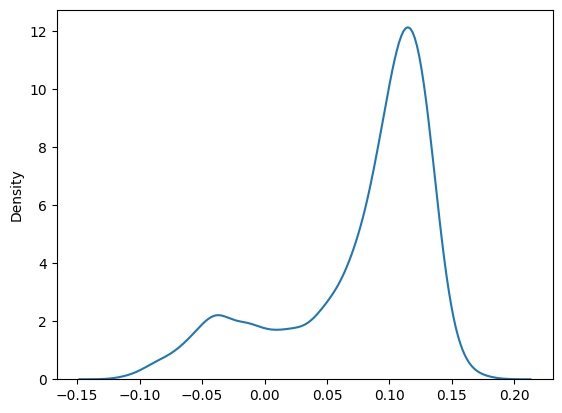

In [ ]:
import matplotlib.pyplot as plt
# plt.hist(y_predict, density=True)

import seaborn as sns
sns.kdeplot(y_predict)

merge le y_predict en prenant le max pour chacune des courses pour donner un gagnant puis faire de la classif ? ou faire de la classif d'abord

In [ ]:
df = df_test_original.copy()
df['y_predict'] = y_predict
df_stats = df.copy()

df_stats['max_prediction'] = df_stats.groupby(level=0)['y_predict'].transform('max')
df_stats['top_prediction'] = (df_stats['y_predict'] == df_stats['max_prediction']).astype(int)
df_stats.drop(columns=['max_prediction'],inplace=True)


In [ ]:
pd.reset_option('display.max_rows')
df_stats = df_stats[['horse_id','won','y_predict','top_prediction']]
df_stats.head()


,horse_id,won,y_predict,top_prediction
race_id,,,,
5079,1343,1.0,0.040316,0
5079,2216,0.0,0.110638,1
5080,2832,0.0,0.124941,0
5080,1236,0.0,0.120047,0
5080,1278,0.0,0.118587,0


In [ ]:
df_stats['won'] = df_stats['won'].astype(int)

In [ ]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15890 entries, 5079 to 6348
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horse_id        15890 non-null  int64  
 1   won             15890 non-null  int64  
 2   y_predict       15890 non-null  float64
 3   top_prediction  15890 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 620.7 KB


In [ ]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

df_stats['accuracy'] = ((df_stats['won'] == 1) & (df_stats['top_prediction'] == 1))
df_stats

,horse_id,won,y_predict,top_prediction,accuracy
race_id,,,,,
5079,1343,1,0.040316,0,False
5079,2216,0,0.110638,1,False
5080,2832,0,0.124941,0,False
5080,1236,0,0.120047,0,False
5080,1278,0,0.118587,0,False
...,...,...,...,...,...
6348,1238,0,-0.068531,0,False
6348,985,0,-0.070053,0,False
6348,3147,0,-0.061670,0,False


In [ ]:
total_races = df_stats.index.nunique()

correct_prediction_races = df_stats.groupby(df_stats.index)['accuracy'].max().sum()
accuracy = (correct_prediction_races / total_races) * 100


In [ ]:
print(f"Précision basée sur les courses : {accuracy:.2f}%")

Précision basée sur les courses : 23.88%


XGBCLASSIFIER

In [ ]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_xgb_predict = xgb.predict(X_test)

<Axes: ylabel='Density'>

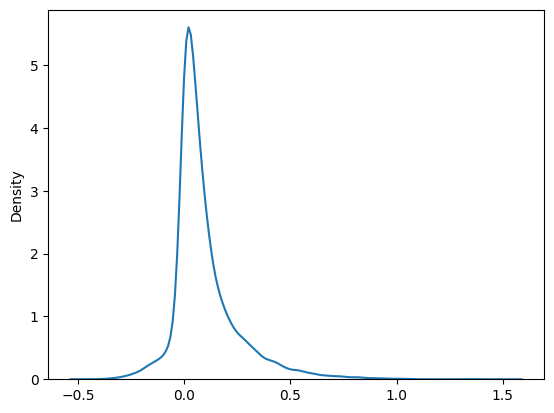

In [ ]:
import matplotlib.pyplot as plt
# plt.hist(y_predict, density=True)

import seaborn as sns
sns.kdeplot(y_xgb_predict)

In [ ]:
df_stats['y_xgb_predict'] = y_xgb_predict

df_stats['max_xgb_prediction'] = df_stats.groupby(level=0)['y_xgb_predict'].transform('max')
df_stats['top_xgb_prediction'] = (df_stats['y_xgb_predict'] == df_stats['max_xgb_prediction']).astype(int)
df_stats.drop(columns=['max_xgb_prediction'],inplace=True)
df_stats = df_stats[['horse_id','won','y_xgb_predict','top_xgb_prediction']]
df_stats.head()

,horse_id,won,y_xgb_predict,top_xgb_prediction
race_id,,,,
5079,1343,1,0.016399,0
5079,2216,0,0.096194,1
5080,2832,0,-0.008840,0
5080,1236,0,0.040023,0
5080,1278,0,0.030466,0


In [ ]:
df_stats['accuracy_xgb'] = ((df_stats['won'] == 1) & (df_stats['top_xgb_prediction'] == 1))
total_races = df_stats.index.nunique()
correct_prediction_races = df_stats.groupby(df_stats.index)['accuracy_xgb'].max().sum()
accuracy_xgb = (correct_prediction_races / total_races) * 100

/var/folders/50/2n82y20j037f62p4wj3z9qsw0000gp/T/ipykernel_1933/616836614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['accuracy_xgb'] = ((df_stats['won'] == 1) & (df_stats['top_xgb_prediction'] == 1))


In [ ]:

print(f"Précision basée sur les courses avec xgboost : {accuracy_xgb:.2f}%")

Précision basée sur les courses avec xgboost : 25.93%


In [ ]:
df.head()

,horse_id,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13,surface_1,distance_1200,distance_1400,distance_1600,distance_1650,distance_1800,distance_2000,distance_2200,distance_2400,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,horse_country_JPN,horse_country_NZ,horse_country_SAF,horse_country_SPA,horse_country_USA,horse_country_ZIM,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan,y_predict
race_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5079,1343,1.0,3,63,1194.0,108,13,42.0,7.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.040316
5079,2216,0.0,3,62,1157.0,115,12,10.0,2.6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.110638
5080,2832,0.0,3,100,1110.0,133,10,12.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.124941
5080,1236,0.0,4,95,1026.0,126,9,9.4,2.5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.120047
5080,1278,0.0,3,94,1104.0,127,14,11.0,3.9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.118587


Stats and Expectancy

In [ ]:
K = 2.5

dfe = df[['horse_id','won','win_odds','place_odds','y_predict']]
dfe['profitable_bet_win'] = (dfe['y_predict']>1/dfe['win_odds'])
dfe['profitable_bet_place'] = ((df['y_predict'] * K).clip(upper=1.0)>1/dfe['place_odds'])
dfe.head(24)

/var/folders/50/2n82y20j037f62p4wj3z9qsw0000gp/T/ipykernel_1933/1386008412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['profitable_bet_win'] = (dfe['y_predict']>1/dfe['win_odds'])
/var/folders/50/2n82y20j037f62p4wj3z9qsw0000gp/T/ipykernel_1933/1386008412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['profitable_bet_place'] = ((df['y_predict'] * K).clip(upper=1.0)>1/dfe['place_odds'])


,horse_id,won,win_odds,place_odds,y_predict,profitable_bet_win,profitable_bet_place
race_id,,,,,,,
5079,1343,1.0,42.0,7.6,0.040316,True,False
5079,2216,0.0,10.0,2.6,0.110638,True,False
5080,2832,0.0,12.0,3.9,0.124941,True,True
5080,1236,0.0,9.4,2.5,0.120047,True,False
5080,1278,0.0,11.0,3.9,0.118587,True,True
5080,1121,0.0,19.0,6.2,0.106354,True,True
5080,1469,0.0,4.3,1.5,0.145525,False,False
5080,549,0.0,15.0,5.2,0.116640,True,True
5080,993,0.0,97.0,20.0,-0.047329,False,False


In [ ]:
df["new_column"] = df.index.map(df_races.set_index("race_id")["column_of_interest"])


In [ ]:
df['win_return'] = (df['profitable_bet_win'] and df['won'] = 1 )